In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### CASE QUESTIONS:

1. What are the major market conditions driving the performance of Imperialumab?
2. As a consequence, what should we do differently?

### DATA SUPPORT

#### Sales

In [2]:
df_sales = pd.read_excel('imperialumab-analytics-workshop.xlsx', sheet_name='Sales All')

In [1]:
#df_sales['Total Market'].cumsum()

In [4]:
df_sales['Total Market'] = df_sales['Imperialumab']+df_sales['Uclumab']+df_sales['Kingsumab']
df_sales_cum = df_sales[['Imperialumab','Uclumab','Kingsumab','Total Market']].cumsum()
df_sales_cum['Date']=df_sales['Date']
df_sales_cum[24:]

,Imperialumab,Uclumab,Kingsumab,Total Market,Date
24,4318,321,1108,5747,2019-03-01
25,4583,365,1333,6281,2019-04-01
26,4853,407,1578,6838,2019-05-01
27,5124,451,1828,7403,2019-06-01


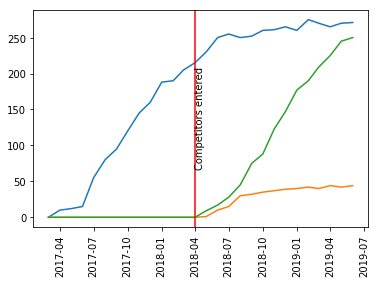

In [5]:
plt.plot(df_sales['Date'],df_sales['Imperialumab'])
plt.plot(df_sales['Date'],df_sales['Uclumab'])
plt.plot(df_sales['Date'],df_sales['Kingsumab'])
plt.axvline('2018-04-01', color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=200,s='Competitors entered',rotation=90)
plt.xticks(rotation='vertical')
plt.show()

Assuming there are only 3 companies on the market, we can show the market share.

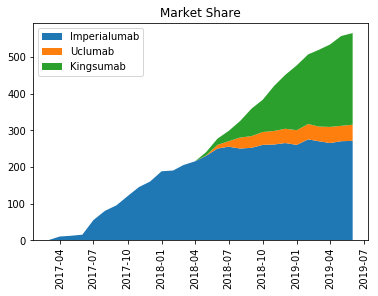

In [6]:
labels = ['Imperialumab','Uclumab','Kingsumab']

plt.stackplot(df_sales['Date'].values,df_sales['Imperialumab'],df_sales['Uclumab'],df_sales['Kingsumab'],labels=labels)
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.title('Market Share')
plt.show()

#### Promotion

In [7]:
df_promo = pd.read_excel('imperialumab-analytics-workshop.xlsx', sheet_name='Promo All')

#### Data Table

In [8]:
df_promo

,Region,IMP - Face 2 Face,IMP - Med Ed,IMP - Unsolicited e-mail,IMP - Hard mail,UCL-Face 2 Face,UCL-Med Ed,UCL-Unsolicited e-mail,UCL-Hard mail,Kings-Face 2 Face,Kings-Med Ed,Kings-Unsolicited e-mail,Kings-Hard mail
0,South West,12,15,14,15,24,2,0,15,12,19,9,13
1,South East,10,12,16,14,25,5,1,15,10,20,10,14
2,London,13,15,17,16,21,4,0,15,13,21,9,16
3,East Midlands,14,13,12,15,23,6,1,15,14,19,8,13
4,West Midlands,12,10,19,14,24,2,2,15,12,18,7,15
5,North East,11,8,8,16,25,3,2,15,11,20,6,17
6,North West,10,11,12,12,21,6,0,15,10,21,8,10
7,Scotland,8,8,21,10,25,8,4,15,8,22,9,12
8,Northern Ireland,12,10,14,20,20,9,1,15,12,18,10,15
9,Wales,10,12,10,11,21,11,0,15,10,20,8,15


### Grouped Stacked Chart 

#### Face 2 Face

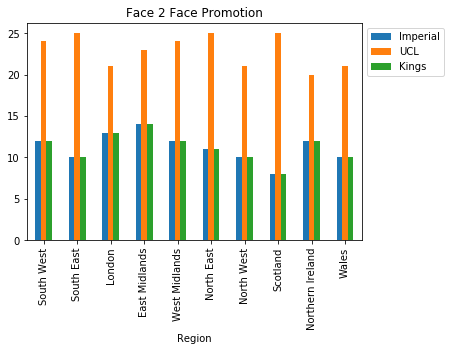

In [9]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Face 2 Face'].values,'UCL': df_promo['UCL-Face 2 Face'].values,'Kings':df_promo['Kings-Face 2 Face'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Face 2 Face Promotion')
plt.show()

#### Med Ed

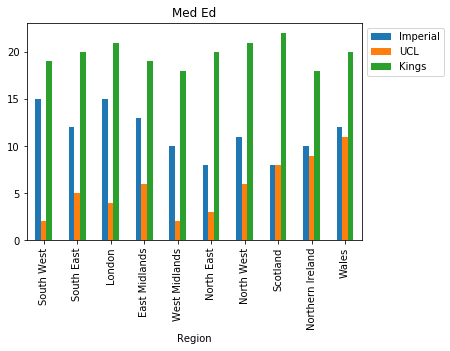

In [10]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Med Ed'].values,'UCL': df_promo['UCL-Med Ed'].values,'Kings':df_promo['Kings-Med Ed'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Med Ed')
plt.show()

#### Unsolicited e-mail

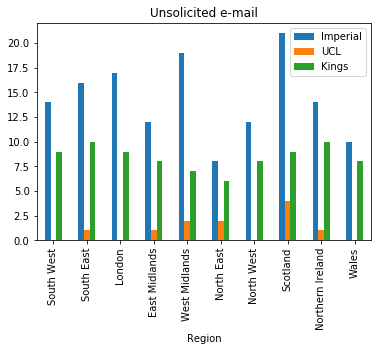

In [11]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Unsolicited e-mail'].values,'UCL': df_promo['UCL-Unsolicited e-mail'].values,'Kings':df_promo['Kings-Unsolicited e-mail'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Unsolicited e-mail')
plt.show()

#### Hard mail

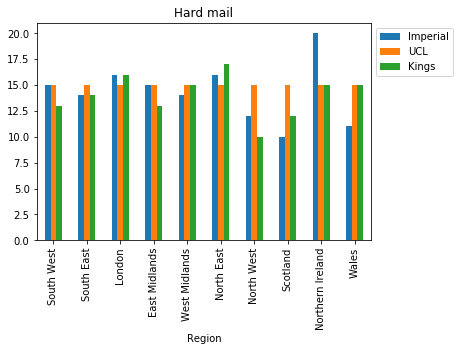

In [12]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Hard mail'].values,'UCL': df_promo['UCL-Hard mail'].values,'Kings':df_promo['Kings-Hard mail'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Hard mail')
plt.show()

### DATA ANALYSIS

#### How would you describe the sales evolution of Imperialumab and competitors over time? <br>

On the charts below representing Net Sales (mils UK) of 3 medicines over time and Cumulative Net Sales over time we can derive some substantial information:
- The sales of Imperialumab is growing steadily over the whole time range: having a smaller grow within first few months, but then sales increased at very high pace

- in April 2018, competition entered the market: Imperialumab does not notice the difference with its grow, competitors grew equally in first few months, and later on around 2018-08 Kingsumab started to grew rapidly, with higher pace than Imperialumab, outcompeting Uclumab, which sales stagnated till the end of period

- Imperialumab had one year to grow without any competition (assuming only 3 actors), however, when competition entered the market Imperialumab kept steady growth till 2018-08, when Kingsumab started to grew rapidly, Imperialsumab growth started to decrease, although still rising but at a slower pace

- Having any competition, Imperialsumab for one year till 2018-08 has the whole market share, then when competition entered the market Imperialsumab market share grew slowly and stagnated, after few months after 2018-08, finally the market share for Imperialsumab stayed at 69%, Kingsumab at 25% and Uclumab at 6%

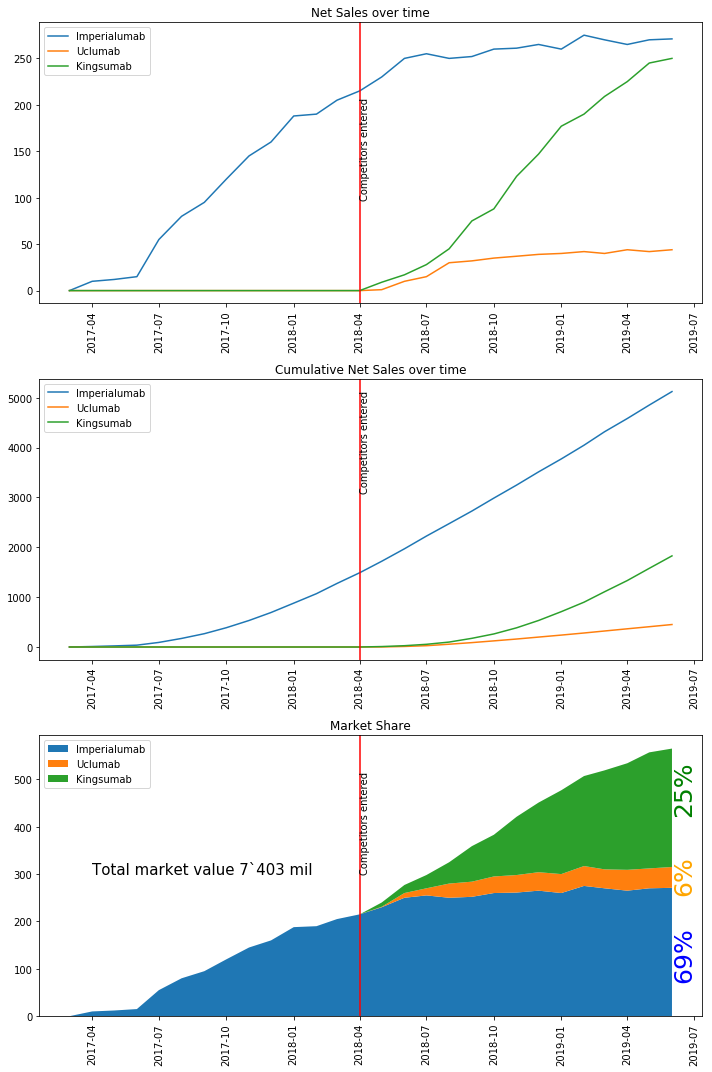

In [13]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(df_sales['Date'],df_sales['Imperialumab'])
plt.plot(df_sales['Date'],df_sales['Uclumab'])
plt.plot(df_sales['Date'],df_sales['Kingsumab'])
plt.axvline('2018-04-01', color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=200,s='Competitors entered',rotation=90)
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Net Sales over time')

plt.subplot(3,1,2)
plt.plot(df_sales['Date'],df_sales['Imperialumab'].cumsum())
plt.plot(df_sales['Date'],df_sales['Uclumab'].cumsum())
plt.plot(df_sales['Date'],df_sales['Kingsumab'].cumsum())
plt.axvline('2018-04-01', color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=5000,s='Competitors entered',rotation=90)
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Cumulative Net Sales over time')


labels = ['Imperialumab','Uclumab','Kingsumab']
plt.subplot(3,1,3)
plt.stackplot(df_sales['Date'].values,df_sales['Imperialumab'],df_sales['Uclumab'],df_sales['Kingsumab'],labels=labels)
plt.xticks(rotation='vertical')
plt.axvline('2018-04-01',color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=500,s='Competitors entered',rotation=90)

plt.text(x='2019-06-01',y=150,s='69%', rotation=90, size=25, color='blue')
plt.text(x='2019-06-01',y=500,s='25%', rotation=90, size=25, color='green')
plt.text(x='2019-06-01',y=300,s='6%', rotation=90, size=25, color='orange')
plt.text(x='2017-04-01',y=300,s='Total market value 7`403 mil', size=15)

plt.legend(loc='upper left')
plt.title('Market Share')


plt.tight_layout()
plt.show()

#### Think about the factors that could be driving this and develop your hypotheses. Could it be that one or more of the brands: <br>
- Have failed to achieve market access? (Hypothesis 1)
- Are subject to genericisation or Parallel Imports? (Hypothesis 2)
- Are discounting heavily on price? (Hypothesis 3)

##### Hypothesis 1: Some of the brands have failed to achieve market access.

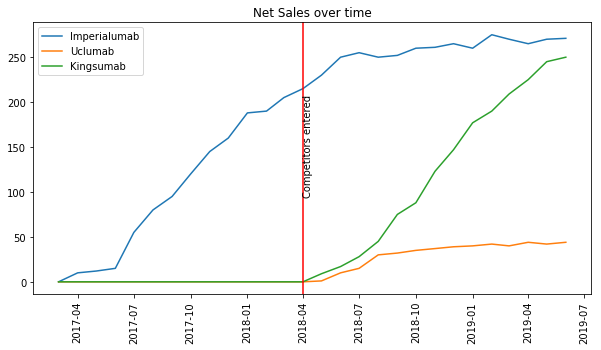

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df_sales['Date'],df_sales['Imperialumab'])
plt.plot(df_sales['Date'],df_sales['Uclumab'])
plt.plot(df_sales['Date'],df_sales['Kingsumab'])
plt.axvline('2018-04-01', color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=200,s='Competitors entered',rotation=90)
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Net Sales over time')
plt.show()

In [15]:
# Table from Market Research Output pdf file
data = [['Imperialumab', 28000,2025], ['UCLumab', 29000,2022], ['Kingsumab',28500,2021]]
df_icer = pd.DataFrame(data, columns= ['Brand','ICER [£/QALY]','LoE'])
df_icer

,Brand,ICER [£/QALY],LoE
0,Imperialumab,28000,2025
1,UCLumab,29000,2022
2,Kingsumab,28500,2021


#### Fact (live session):
- threshold to gain the market access is about 30000/QALY

As we can see from the market sales evolution of all 3 competitors, it seemed that the Imperialumab has entered the market first without any competitors, as from 2017-03 till 2018-04 other brands do not show any positive net sales. 

Regarding the ICER value: all 3 brands are below the market access threshold, which is 30000/QALY, so this factor does not explain, why Kingsumab and Uclumab entered the market later.


Note: We assume that other factors such as sales allowances, heavy discounts and returns cannot come into play when dealing with pharmaceuticals at such an early selling stage, so it cannot explain Imperialumab's competitors null sales figures over this period.

##### Hypothesis 2: Some of the brands are subject to genericisation or Parallel Imports.

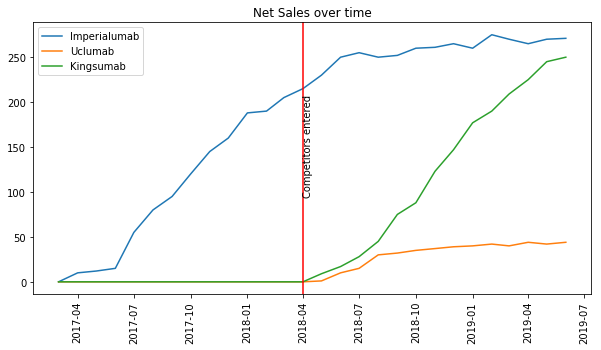

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df_sales['Date'],df_sales['Imperialumab'])
plt.plot(df_sales['Date'],df_sales['Uclumab'])
plt.plot(df_sales['Date'],df_sales['Kingsumab'])
plt.axvline('2018-04-01', color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=200,s='Competitors entered',rotation=90)
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Net Sales over time')
plt.show()

In [17]:
# Table from Market Research Output pdf file
data = [['Imperialumab', 28000,2025], ['UCLumab', 29000,2022], ['Kingsumab',28500,2021]]
df_icer = pd.DataFrame(data, columns= ['Brand','ICER [£/QALY]','LoE'])
df_icer[['Brand','LoE']]

,Brand,LoE
0,Imperialumab,2025
1,UCLumab,2022
2,Kingsumab,2021


We are assuming that 3 competitors sell their products on the same market, so all of them are exposed to genericisation and Paralell Imports threats. With genericisation issue we are assuming that all 3 actors have started to sell their products just after getting the rights to access the market. We can exclude genericisation threat, as with the given data: LoE dates and sales period till 2019-07, competitors with generics have to wait at least till 2021, before the first molecule patent of Kingsumab will expire.

In our opinion the data does not hold the Paralell Imports issue as well, giving the fact that if an imported drug would occur on the market it would affect all 3 brands, decreasing their net sales, however this situtation does not happen on the sales over time graph.


##### Hypothesis 3: Some of the brands are discounting heavily on price.

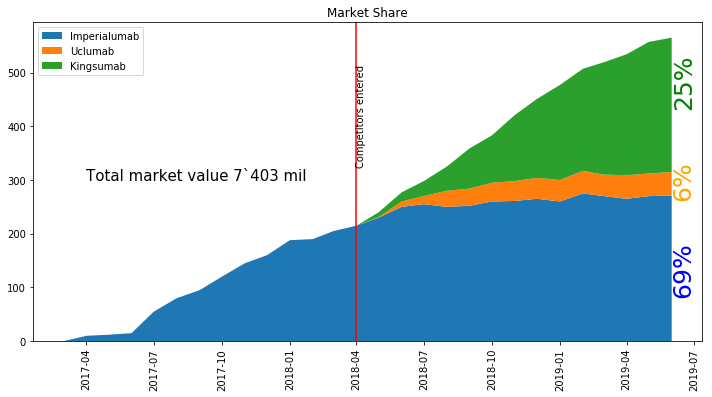

In [18]:
plt.figure(figsize=(10,15))
labels = ['Imperialumab','Uclumab','Kingsumab']
plt.subplot(3,1,3)
plt.stackplot(df_sales['Date'].values,df_sales['Imperialumab'],df_sales['Uclumab'],df_sales['Kingsumab'],labels=labels)
plt.xticks(rotation='vertical')
plt.axvline('2018-04-01',color='red') #Competitors entered the market
plt.text(x='2018-04-01',y=500,s='Competitors entered',rotation=90)

plt.text(x='2019-06-01',y=150,s='69%', rotation=90, size=25, color='blue')
plt.text(x='2019-06-01',y=500,s='25%', rotation=90, size=25, color='green')
plt.text(x='2019-06-01',y=300,s='6%', rotation=90, size=25, color='orange')
plt.text(x='2017-04-01',y=300,s='Total market value 7`403 mil', size=15)

plt.legend(loc='upper left')
plt.title('Market Share')


plt.tight_layout()
plt.show()

##### Facts:
- Per milligram prices for the three individual brands differ +/- 5%
- The average cost per patient between all three treatment regimens differ +/- 0.1%.

As we can see from the market share and pricing data for all 3 competitors, Imperialsumab has entered the market first without any competition for a year, so it could dictate the price, thus with activating different promotion strategies its sales grew steadily over time. The situation has changed in 2018-04, when 2 other competitors joined the market. We can notice that two of them started similarly, gaining the traction in the market for first few months, later on in 2018-08 Kingsumab started to grow rapidly, surpassing Uclumab and catching up Imperialsumab. As Imperialsumab, being first on the market, had created already strong brand among the clients and taken vast amount of the market share, we could assume that Kingsumab had decided to take aggressive pricing strategy in order to win the clients. This could explain such a rapid growth over short period of time from 2018-08 till 2019-07, while Imperialsumab one has stagnated.

However, taking into account the fact that per milligram prices differs only +/- 5% and the average cost per patient differs +/- 0.1%, there is not much room for price reduction for Kingsumab. Therefore there shall be other factors influencing such a significant growth.

The other potential factors explaining this situation could be promotion quantity and quality discussed in Hypothesis 6.

#### Consider the commercial effectiveness of each company in promoting their medicine:
- Are physicians recalling clinical characteristics as we would expect? (Hypothesis 4)
- Are we engaging physicians optimally versus their communication (channel) preferences? (Hypothesis 5)

In [19]:
# Table from Channel Mix Optimisation Report
data = [['F2F', 12], ['Med Ed', 17], ['Unsolicited email',9],['Hard mail', 14]]
df_channel = pd.DataFrame(data, columns= ['Channel','Optimum'])
df_channel[['Channel','Optimum']].style.hide_index()

Channel,Optimum
F2F,12
Med Ed,17
Unsolicited email,9
Hard mail,14


##### Hypothesis 4: Are physicians recalling clinical characteristics as we would expect.

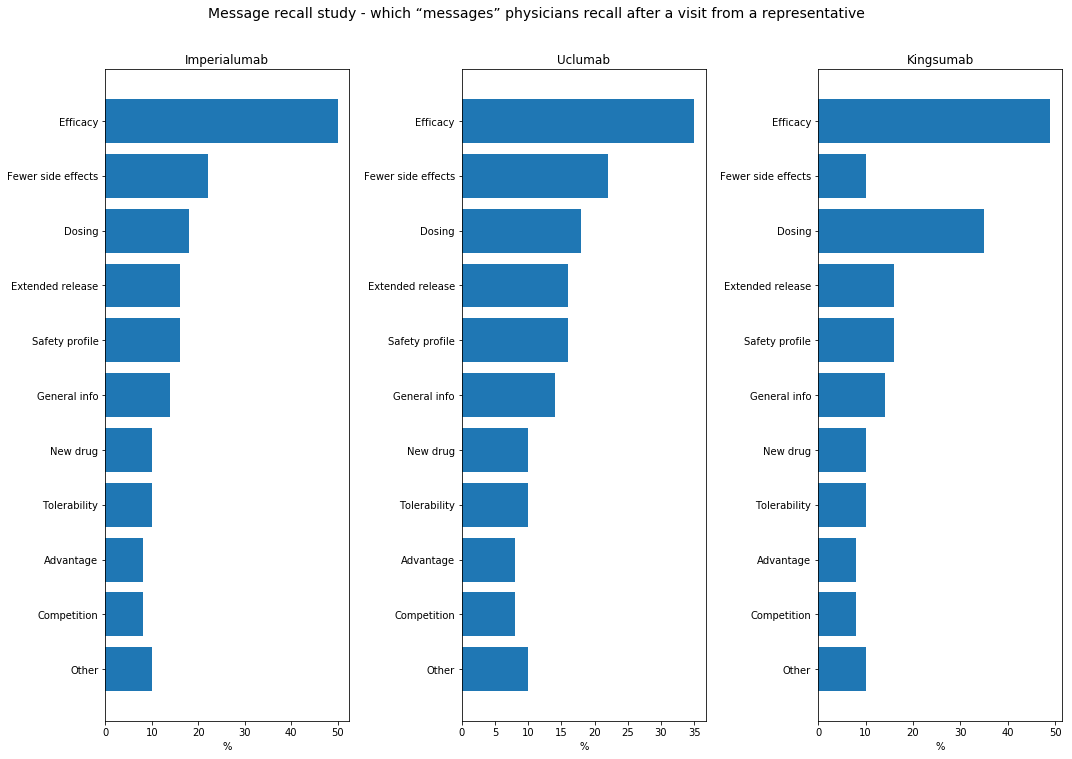

In [20]:
# The data taken from Market Research Output

Imperial = [50,22,18,16,16,14,10,10,8,8,10]
Ucl = [35,22,18,16,16,14,10,10,8,8,10]
Kings = [49,10,35,16,16,14,10,10,8,8,10]
factors = ['Efficacy','Fewer side effects','Dosing','Extended release','Safety profile','General info','New drug','Tolerability','Advantage','Competition','Other']

plt.figure(figsize=(15,10))
plt.suptitle('Message recall study - which “messages” physicians recall after a visit from a representative',y=1.05,fontsize=14)

plt.subplot(1,3,1)
plt.barh(factors,Imperial)
plt.title('Imperialumab')
plt.xlabel('%')
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
plt.barh(factors,Ucl)
plt.title('Uclumab')
plt.xlabel('%')
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.barh(factors,Kings)
plt.title('Kingsumab')
plt.xlabel('%')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [21]:
# Table from Market Research Report
data = [['Efficacy', '1st','2nd','2nd'], ['Side effect profile', '1st','2nd','2nd'], ['Dosing', '2nd','2nd','1st'],['Formulation', '1st','3rd','2nd'],['Safety', '1st','1st','1st']]
df_profile = pd.DataFrame(data, columns= ['Attribute','Imperialumab','Uclumab','Kingsumab'])

df_profile.style.hide_index()

Attribute,Imperialumab,Uclumab,Kingsumab
Efficacy,1st,2nd,2nd
Side effect profile,1st,2nd,2nd
Dosing,2nd,2nd,1st
Formulation,1st,3rd,2nd
Safety,1st,1st,1st


As we can see in the Comparison of clinical characteristics table, Imperialumab takes 1st place from 4 out of 5 attributes, where for safety profile attribute it shares it with others competitors, as obviously every drug has to be safe. The only factor where Imperialumab is on 2nd place, ex aequo with Uclumab and surpassed by Kingsumab, is Dosing attribute.

Clearly, while preparing our marketing strategy how to present the drug to physicians, we would like to point out strengths of Imperialumab clinical profile over its competitors. We have to focus our marketing on describing each winning factor and the fact that it outperforms competition in 80% of all other attributes.

As we can see from the Message recall study results, Imperialumab representatives have marketed the product correctly, as top attributes remembered are those, in which the drug outperforms competition. However, there are some attributes, which shall be presented in other way: in case of Dosing one of the competitors (Kingsumab) is superior over the rest and it is is very high on the recall list. We see that competition attribute, which as well is Imperialumab's strength, as it outperforms competition in 80% of the factors, is ranked really low (8%).

#### Recommendation:
- marketing representatives presenting the drugs strengths, 1st places attributes
- decrease the dosing information
- increase the info about Imperialumab's outperforming competition in 80% of the factors

##### Hypothesis 5: Are we engaging physicians optimally versus their communication (channel) preferences

In [22]:
# Table from Channel Mix Optimisation Report
data = [['F2F', 12,11.2], ['Med Ed', 17,11.4], ['Unsolicited email',9,14.3],['Hard mail', 14,14.3]]
df_channel = pd.DataFrame(data, columns= ['Channel','Optimum','Imperialumab Mean'])
df_channel[['Channel','Optimum','Imperialumab Mean']]

,Channel,Optimum,Imperialumab Mean
0,F2F,12,11.2
1,Med Ed,17,11.4
2,Unsolicited email,9,14.3
3,Hard mail,14,14.3


In [23]:
df_optimal = df_promo[['Region','IMP - Face 2 Face','IMP - Med Ed','IMP - Unsolicited e-mail','IMP - Hard mail']]
df_optimal = df_optimal.set_index('Region')

#df_optimal['Optimum']=['Average',12,17,9,14]

df_optimal['F2F +/-']=df_optimal['IMP - Face 2 Face']-12
df_optimal['MedEd +/-']=df_optimal['IMP - Med Ed']-17
df_optimal['Email +/-']=df_optimal['IMP - Unsolicited e-mail']-9
df_optimal['Mail +/-']=df_optimal['IMP - Hard mail']-14

df_optimal = df_optimal[['IMP - Face 2 Face','F2F +/-','IMP - Med Ed','MedEd +/-','IMP - Unsolicited e-mail','Email +/-', 'IMP - Hard mail','Mail +/-']]
df_optimal

,IMP - Face 2 Face,F2F +/-,IMP - Med Ed,MedEd +/-,IMP - Unsolicited e-mail,Email +/-,IMP - Hard mail,Mail +/-
Region,,,,,,,,
South West,12,0,15,-2,14,5,15,1
South East,10,-2,12,-5,16,7,14,0
London,13,1,15,-2,17,8,16,2
East Midlands,14,2,13,-4,12,3,15,1
West Midlands,12,0,10,-7,19,10,14,0
North East,11,-1,8,-9,8,-1,16,2
North West,10,-2,11,-6,12,3,12,-2
Scotland,8,-4,8,-9,21,12,10,-4
Northern Ireland,12,0,10,-7,14,5,20,6


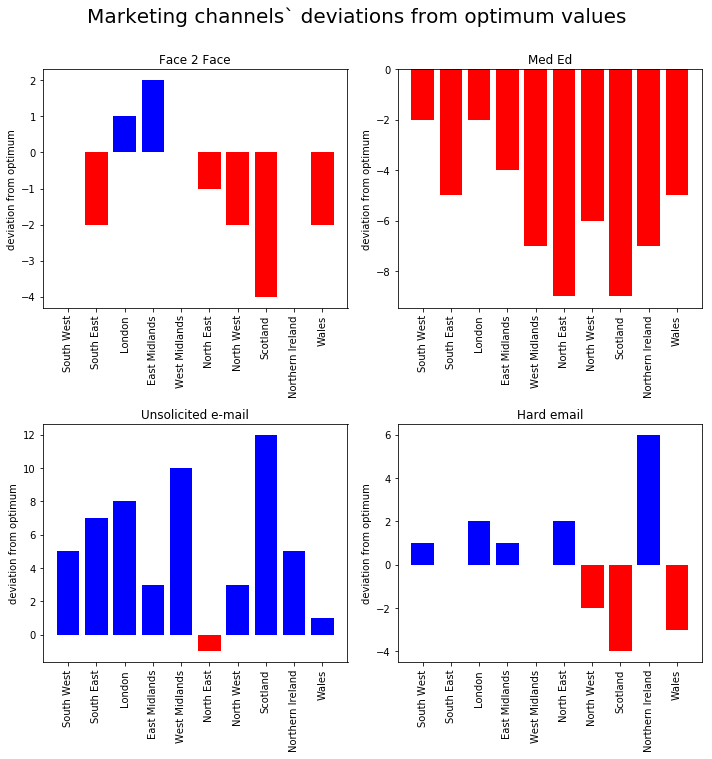

In [24]:
plt.figure(figsize=(10,10))

plt.suptitle('Marketing channels` deviations from optimum values', y=1.05, fontsize=20)

plt.subplot(2,2,1)
plt.bar(df_optimal.reset_index()['Region'],df_optimal['F2F +/-'],color=(df_optimal['F2F +/-'] > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Face 2 Face')

plt.subplot(2,2,2)
plt.bar(df_optimal.reset_index()['Region'],df_optimal['MedEd +/-'],color=(df_optimal['MedEd +/-'] > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Med Ed')

plt.subplot(2,2,3)
plt.bar(df_optimal.reset_index()['Region'],df_optimal['Email +/-'],color=(df_optimal['Email +/-'] > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Unsolicited e-mail')

plt.subplot(2,2,4)
plt.bar(df_optimal.reset_index()['Region'],df_optimal['Mail +/-'],color=(df_optimal['Mail +/-'] > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Hard email')

plt.tight_layout()
plt.show()

We have analyzed the data from Channel Mix Optimisation Report and compare them to the actual marketing mix for Imperialsumab. 
On the graphs above we have a graph for each marketing channel. On the x axis we presented regions and on y axis deviation from the optimum value. This means that for Face 2 Face channel: South West region is optimized, South East region is underestimated (no. of visits shall be increased), London region is overestimated (no. of visits shall be decreased).

As we can see from the tables and graphs above some channels deviate stronger than others, taking into account optimal resources allocation. Med Ed channel is highly underestimated in almost all regions. On the contrary, Unsolicited e-mail is overestimated in all but one regions. Face 2 Face and Hard mail channels are somehow mix of optimal, underestimation and overestimation of resources. 

Simply allocating more resources in underestimated channels is not as optimal solution as it may seem. We have to take into account the cost of each channel to understand why we see this situation and how to proceed forward. As we do not have any data about the budget and cost differentiation by channels, we have to assume with a common sense following order: Unsolicited email, Hard email, Face 2 Face and Med Ed (from least to most expensive channels). Still we do not know the cost proportion of the channels and their effectiveness, so it is hard to allocate resources without this information.

Overall, we think that all values shall be brought to the optimum values to ensure best effectiveness of resources allocation, otherwise we will loose money (all of this with the assumption that channel mix optimization data are correct).

#### Geomap
It will be nicer if sb is able to draw a choropleth map and show the data on the map according to session 9.2 - A Geomap with colours would also be an alternative, since the redeployment strategy may also need to account for the geography: try redeploying people to neighbour regions first for example.

##### Hypothesis 6: Some of the brands have better promotional mix strategy - including regions diversification for sales

In [25]:
df_compare = df_promo[['Region',
                       'IMP - Face 2 Face',
                       'Kings-Face 2 Face',
                       'IMP - Med Ed',
                       'Kings-Med Ed',
                       'IMP - Unsolicited e-mail',
                       'Kings-Unsolicited e-mail',
                       'IMP - Hard mail',
                       'Kings-Hard mail']]
df_compare

,Region,IMP - Face 2 Face,Kings-Face 2 Face,IMP - Med Ed,Kings-Med Ed,IMP - Unsolicited e-mail,Kings-Unsolicited e-mail,IMP - Hard mail,Kings-Hard mail
0,South West,12,12,15,19,14,9,15,13
1,South East,10,10,12,20,16,10,14,14
2,London,13,13,15,21,17,9,16,16
3,East Midlands,14,14,13,19,12,8,15,13
4,West Midlands,12,12,10,18,19,7,14,15
5,North East,11,11,8,20,8,6,16,17
6,North West,10,10,11,21,12,8,12,10
7,Scotland,8,8,8,22,21,9,10,12
8,Northern Ireland,12,12,10,18,14,10,20,15
9,Wales,10,10,12,20,10,8,11,15


### How to put all the 4 graphs below into one figure? 2x2 grid

#### Face 2 Face

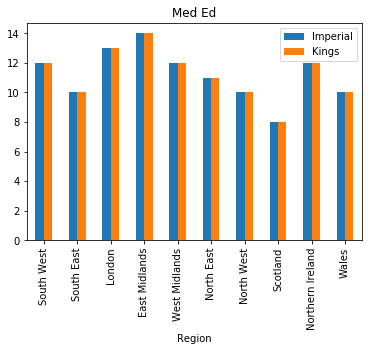

In [26]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Face 2 Face'].values,'Kings':df_promo['Kings-Face 2 Face'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Med Ed')
plt.show()

#### Med Ed

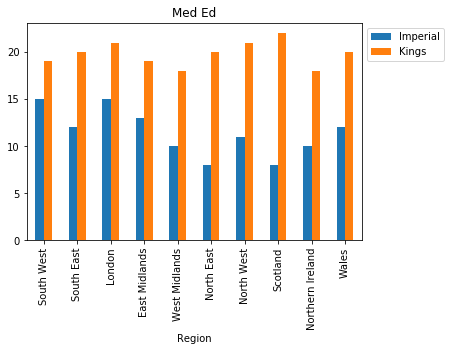

In [27]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Med Ed'].values,'Kings':df_promo['Kings-Med Ed'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Med Ed')
plt.show()

#### Unsolicited e-mail

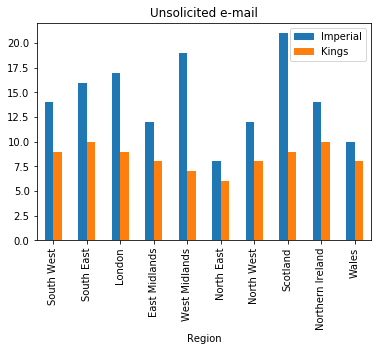

In [28]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Unsolicited e-mail'].values,'Kings':df_promo['Kings-Unsolicited e-mail'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Unsolicited e-mail')
plt.show()

#### Hard mail

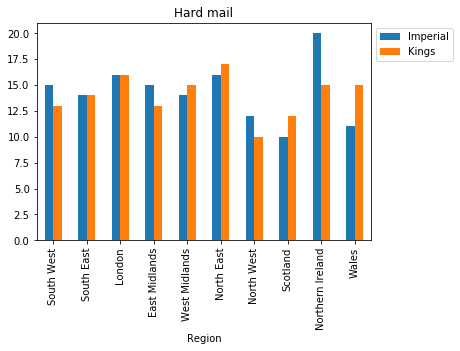

In [29]:
df = pd.DataFrame({'Imperial': df_promo['IMP - Hard mail'].values,'Kings':df_promo['Kings-Hard mail'].values}, index=df_promo['Region'])
ax = df.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.title('Hard mail')
plt.show()

In this hypothesis we are stating that Kingsumab has bettter promotional mix, which allows the brand to perform better on market - more rapid growth than Imperialumab seen on net sales graph. As Imperialumab outperform other competitors in most of all clinial attributes and discounts are not the case (price differ only aorund 5% among competitors), we think that other factors such as better promotional mix coud play a big role in sales performance. 

We have analyzed the promotional mix of both Imperialumab and Kingsumab, comparing them to each other on a bar graph. This allows us to see the differences between Imperialumab and Kingsumab by different promotional channels. As Uclumab is not performing well on the market, we have excluded it from the analysis. As with Face 2 Face and Hard mails channels the figures are almost the same, therefore they cannot be responsible for the Kingsumab sales growth (we are assuming same quality of promotional activities). Imperialumab is outperforming Kingsumab in Unsolicited e-mail, so it cannot drive good sales of Kingsumab neither. The only channel, where Kingsumab put more resources than Imperialumab, over 70% more on average, is Med Ed channel. 

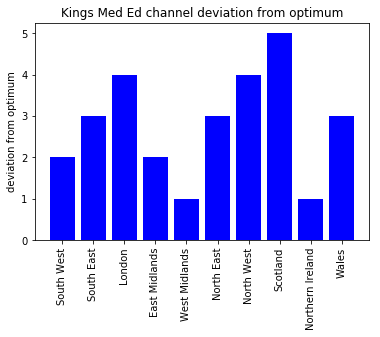

In [30]:
plt.bar(df_promo.reset_index()['Region'],df_promo['Kings-Med Ed']-17,color=(df_promo['Kings-Med Ed']-17 > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Kings Med Ed channel deviation from optimum')
plt.show()

As we have learned during Hypothesis 5 analysis, this is one of the most underestimated channel, when it comes to marketing resources allocation for Imperialumab.

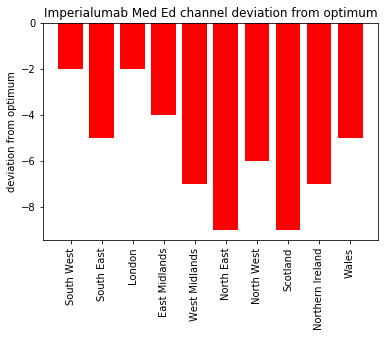

In [31]:
plt.bar(df_promo.reset_index()['Region'],df_promo['IMP - Med Ed']-17,color=(df_promo['IMP - Med Ed']-17 > 0).map({True: 'b', False: 'r'}))
plt.xticks(rotation='vertical')
plt.ylabel('deviation from optimum')
plt.title('Imperialumab Med Ed channel deviation from optimum')
plt.show()